<a href="https://colab.research.google.com/github/Gabriele90/ML-for-the-life-sciences-/blob/main/Alzheimer's_disease_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Introduction***

In this study, I aimed to present the use of deep learning for the high-accuracy detection of Alzheimer's disease condition using MRI images. Publicly available MRI images were used in the experiment, which involved the training of deep learning and machine learning classifiers. The experiment was performed using five machine learning models: 

EfficientNet

CNN

InceptionV3

ResNet

AlexNet

In general, the EfficientNet models achieve both higher accuracy and better efficiency over existing CNNs, reducing parameter size and FLOPS by an order of magnitude. For example, in the high-accuracy regime, our EfficientNet-B7 reaches state-of-the-art 84.4% top-1 / 97.1% top-5 accuracy on ImageNet, while being 8.4x smaller and 6.1x faster on CPU inference than the previous Gpipe. Compared with the widely used ResNet-50, our EfficientNet-B4 uses similar FLOPS, while improving the top-1 accuracy from 76.3% of ResNet-50 to 82.6% (+6.3%).

***Importing Libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import os 
import tqdm
import glob
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.utils import to_categorical
from keras import optimizers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

import tensorflow_addons as tfa
from tensorflow.keras.metrics import Metric
from tensorflow_addons.utils.types import AcceptableDTypes, FloatTensorLike
from typeguard import typechecked
from typing import Optional

import cv2
import random
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator

***Importing the dataset***

The data consists of MRI images. The data has four classes of images both in training as well as a testing set:

Mild Demented

Moderate Demented

Non Demented

Very Mild Demented

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Alzheimer_s Dataset'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [ ]:
main_dir = "/content/drive/MyDrive/Alzheimer_s Dataset"
#set the path to the train dir
train_dir = os.path.join(main_dir,'train')
#set the path to the test dir
test_dir = os.path.join(main_dir,'test')
#directory with the training Mild demented images
train_mild_dir = os.path.join(train_dir, 'MildDemented')
#directory with the training very milded images
train_verymild_dir = os.path.join(train_dir, 'VeryMildDemented')
#directory with the training Moderate demented images
train_moderate_dir = os.path.join(train_dir, 'ModerateDemented')
#directory with the training no demented images
train_nodement_dir = os.path.join(train_dir, 'NonDemented')
#directory with the test Mild demented images
test_mild_dir = os.path.join(test_dir, 'MildDemented')
#directory with the test very milded images
test_verymild_dir = os.path.join(test_dir, 'VeryMildDemented')
#directory with the test Moderate demented images
test_moderate_dir = os.path.join(test_dir, 'ModerateDemented')
#directory with the test no demented images
test_nodement_dir = os.path.join(test_dir, 'NonDemented')

In [ ]:
train_mild_names = os.listdir(train_mild_dir)
print(train_mild_names[:5])

train_verymild_names = os.listdir(train_verymild_dir)
print(train_verymild_names[:5])

train_moderate_names = os.listdir(train_moderate_dir)
print(train_moderate_names[:5])

train_nodement_names = os.listdir(train_nodement_dir)
print(train_nodement_names[:5])

test_mild_names = os.listdir(test_mild_dir)
print(test_mild_names[:5])

test_verymild_names = os.listdir(test_verymild_dir)
print(train_verymild_names[:5])

test_moderate_names = os.listdir(test_moderate_dir)
print(test_moderate_names[:5])

test_nodement_names = os.listdir(test_nodement_dir)
print(test_nodement_names[:5])

['mildDem105.jpg', 'mildDem10.jpg', 'mildDem103.jpg', 'mildDem107.jpg', 'mildDem116.jpg']
['verymildDem1567.jpg', 'verymildDem1554.jpg', 'verymildDem157.jpg', 'verymildDem1539.jpg', 'verymildDem1534.jpg']
['moderateDem17.jpg', 'moderateDem24.jpg', 'moderateDem15.jpg', 'moderateDem1.jpg', 'moderateDem23.jpg']
['nonDem2411.jpg', 'nonDem2378.jpg', 'nonDem2372.jpg', 'nonDem2381.jpg', 'nonDem2374.jpg']
['26 (19).jpg', '28 (12).jpg', '28 (10).jpg', '27 (7).jpg', '27 (26).jpg']
['verymildDem1567.jpg', 'verymildDem1554.jpg', 'verymildDem157.jpg', 'verymildDem1539.jpg', 'verymildDem1534.jpg']
['28.jpg', '29.jpg', '28 (2).jpg', '31.jpg', '27 (2).jpg']
['26 (63).jpg', '26 (67).jpg', '26 (100).jpg', '26 (62).jpg', '26 (64).jpg']


***Data visualization***

In [ ]:
#print the total no of images present in each dir
print("Total images in the training set:", len(train_mild_names+train_verymild_names+train_nodement_names+train_moderate_names))
print("Total images in the test set:", len(test_mild_names+test_verymild_names+train_nodement_names+train_moderate_names))

Total images in the training set: 3451
Total images in the test set: 1751


In [ ]:
#get the filenames from the covid & normal dir of the train dataset
mild_pic =[os.path.join(train_mild_dir, filename) for filename in train_mild_names[0:4]]
verymild_pic =[os.path.join(train_verymild_dir, filename) for filename in train_verymild_names[0:4]]
moderate_pic =[os.path.join(train_moderate_dir, filename) for filename in train_moderate_names[0:4]]
nodement_pic =[os.path.join(train_nodement_dir, filename) for filename in train_nodement_names[0:4]]

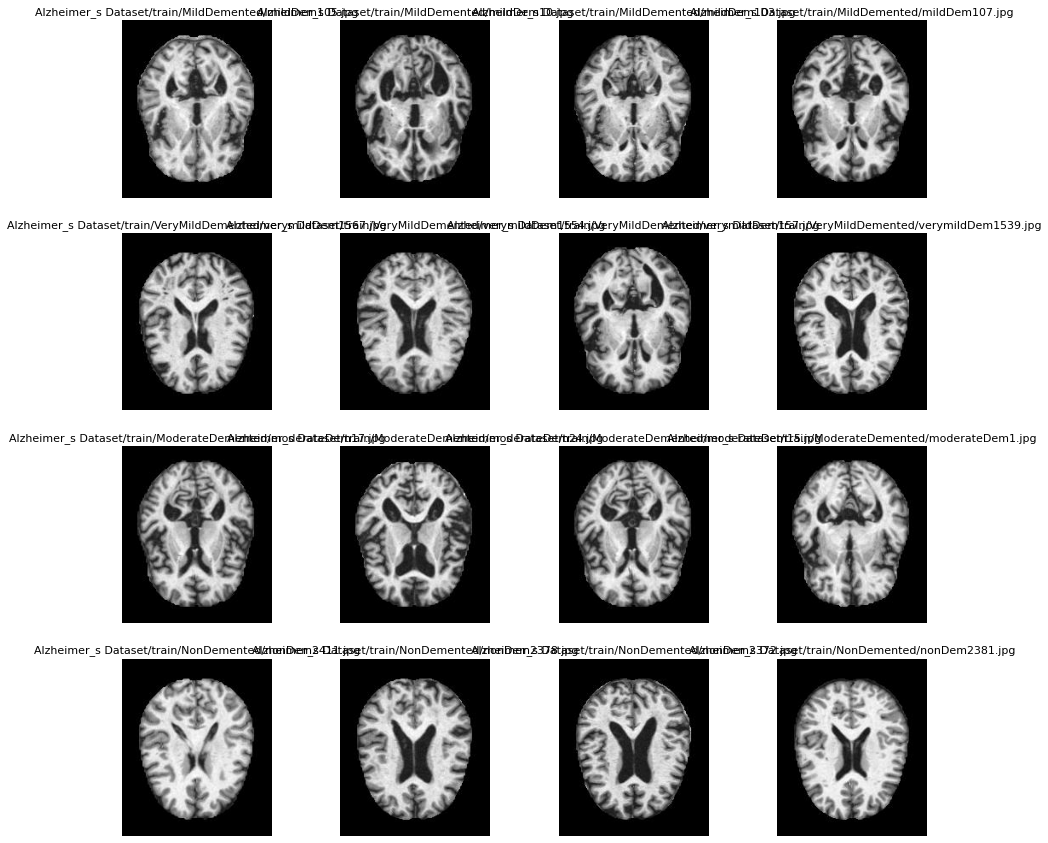

In [ ]:
import matplotlib.pyplot as plt
# plot a grid of 16 images (2 images of each class)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(15,15)
#merge the covid and normal list
merged_list = mild_pic+verymild_pic+moderate_pic+nodement_pic
for i , img_path in enumerate(merged_list):
  data= img_path.split('/', 4)[4]
  sp = plt.subplot(rows, cols, i + 1 )
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=11)
  plt.imshow(img,cmap='gray')

  plt.show

***Image Cropping***

The MRIs contain a black background around the central image of the brain. This black background provides no useful information about the tumor and would be waste if fed to neural networks. Hence cropping the images around the main contour would be useful. For this we use cv2.findContours() from the ‘cv2’ library.

In [ ]:
x = []
y = []

for i in tqdm(os.listdir(train_mild_dir)):
    path = os.path.join(train_mild_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Mild')

for i in tqdm(os.listdir(train_verymild_dir)):
    path = os.path.join(train_verymild_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Very mild')

for i in tqdm(os.listdir(train_moderate_dir)):
    path = os.path.join(train_moderate_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Moderated')   

for i in tqdm(os.listdir(train_nodement_dir)):
    path = os.path.join(train_nodement_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('No dementia')

100%|██████████| 1072/1072 [04:36<00:00,  3.88it/s]


In [ ]:
for i in tqdm(os.listdir(test_mild_dir)):
    path = os.path.join(test_mild_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Mild')

for i in tqdm(os.listdir(test_verymild_dir)):
    path = os.path.join(test_verymild_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Very mild')

for i in tqdm(os.listdir(test_moderate_dir)):
    path = os.path.join(test_moderate_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Moderated')   

for i in tqdm(os.listdir(test_nodement_dir)):
    path = os.path.join(test_nodement_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('No dementia')

100%|██████████| 640/640 [02:44<00:00,  3.88it/s]


***Data dimension and class label encoding***

In [ ]:
x = np.array(x)
y = np.array(y)
x.shape,y.shape

((4730, 224, 224, 3), (4730,))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


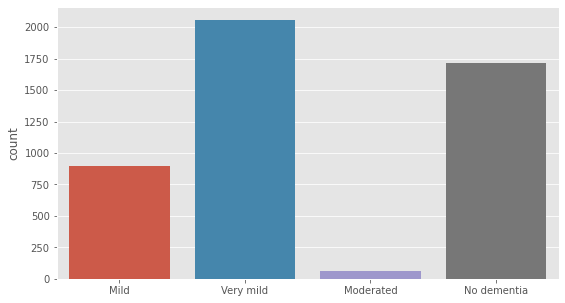

In [ ]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(y)
plt.show()

In [ ]:
y

array(['Mild', 'Mild', 'Mild', ..., 'No dementia', 'No dementia',
       'No dementia'], dtype='<U11')

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
y = to_categorical(y)#num_classes = 4
y.shape

(4730, 4)

In [ ]:
from sklearn.utils import shuffle
x,y = shuffle(x,y)

***Data splitting***

When developing a deep learning-based
method, using a rigorous evaluation process is essential
to avoid overfitting to training data or the generation of
fake information. In order to evaluate the performance of
the network, it is generally recommended to split data into
training, valid, and test sets. The training set data are used
to determine the network parameters. In most cases, the
network shows good performance for the training set after

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
y_test.shape

(946, 4)

***Data Augmentation***

The amount of data gathered was very low and could cause the models to under-fit. Hence, we would use a brilliant technique of Data Augmentation to increase the amount of data. This technique relies on rotations, flips, change in exposure, etc to create similar images. Using this technique we can increase the size of data by a high factor.
The output image of the cropping stage is given as input to ImageDataGenerator which is a function in keras.preprocessing.image library. This function takes multiple arguments that decide how Augmentation takes place.

In [ ]:
img_size=224
train_datagen = ImageDataGenerator(rotation_range=30,height_shift_range=0.2,
                                  zoom_range = 0.3,horizontal_flip=True)#rescale=(1./255),
test_datagen = ImageDataGenerator()#rescale=(1./255)

train_gen = train_datagen.flow_from_directory(directory = train_dir,target_size=(img_size,img_size),class_mode ="categorical",
                                              batch_size=32)
test_gen = test_datagen.flow_from_directory(directory = test_dir,target_size=(img_size,img_size),class_mode ="categorical",
                                              batch_size=32)

Found 3451 images belonging to 4 classes.
Found 1279 images belonging to 5 classes.


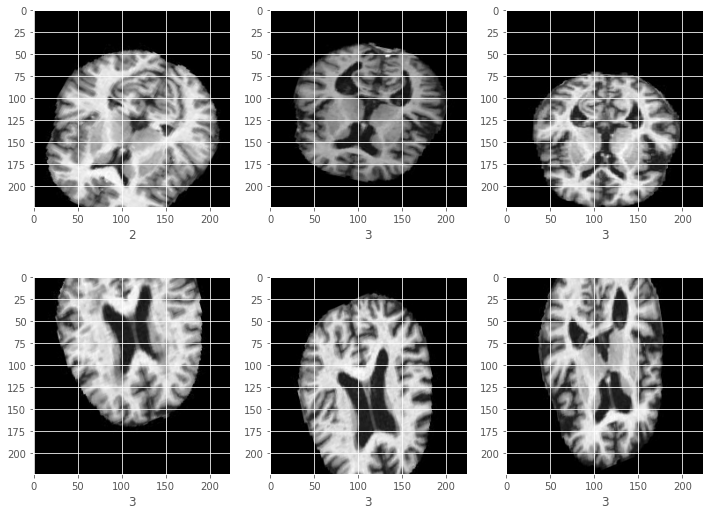

In [ ]:
from tensorflow.keras.preprocessing import image
sample_x,sample_y = next(train_gen)
plt.figure(figsize=(12,9))
for i in range(6):
    plt.subplot(2,3,i+1)
    sample = image.array_to_img(sample_x[i])
    plt.xlabel(np.argmax(sample_y[i]))
    plt.imshow(sample)
plt.show()

In [ ]:
#get the class indices
train_gen.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

In [ ]:
#get the image shape
train_gen.image_shape

(224, 224, 3)

***Model Building & Training***

So until now we have cleaned, pre-processed, augmented, pickled the data and now we are ready to feed it to a ‘Neural Network’ and see how it performs. We will try five different  techniques and see which technique generates models that have higher accuracies.

***EfficientNetB0***

EfficientNet-b0 is a convolutional neural network that is trained on more than a million images from the ImageNet database. The network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224. 

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import EfficientNetB0
effnet = EfficientNetB0(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,GlobalAveragePooling2D

16711680/16705208 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint( "effnet.h5" ,monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
model = effnet.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation = "softmax")(model)

model = Model(inputs = effnet.input,outputs = model)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

***Convoluntional Neural Network***

Convolutional Neural Networks (CNN) is one of the variants of neural networks used heavily in the field of Computer Vision. It derives its name from the type of hidden layers it consists of. The hidden layers of a CNN typically consist of convolutional layers, pooling layers, fully connected layers, and normalization layers. CNN's are very good at feature extraction, thus the can learn features of all four classes.
The different types of layers in CNN like the pooling layer help in extracting the important features from the image. Hence adding convolution layers with pooling layers over top of a simple neural network makes it great for image recognization.

In [ ]:
model_1 = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model_1.add(Conv2D(32,(5,5), padding='SAME', activation='relu', input_shape=(224,224,3)))
# pooling layer
model_1.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model_1.add(Dropout(0.5))
# add another convolutional layer
model_1.add(Conv2D(64,(5,5), padding='SAME', activation='relu'))
# pooling layer
model_1.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model_1.add(Dropout(0.5))
# Flatten layer
model_1.add(Flatten())
# add a dense layer : amount of nodes, activation
model_1.add(Dense(256, activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model_1.add(Dropout(0.5))
model_1.add(Dense(4,activation='softmax'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0

***InceptionV3 model***

Inceptionv3 is a convolutional neural network for assisting in image analysis and object detection, and got its start as a module for Googlenet. It is the third edition of Google's Inception Convolutional Neural Network, originally introduced during the ImageNet Recognition Challenge. Just as ImageNet can be thought of as a database of classified visual objects, Inception helps classification of objects in the world of computer vision. One such use is in life sciences, where it aids in the research of Leukemia.

In [ ]:
base_model = InceptionV3(input_shape=(224,224,3), 
                   include_top=False,
                   weights="imagenet")

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# Freezing Layers

for layer in base_model.layers:
    layer.trainable=False

In [ ]:

model_2=Sequential()
model_2.add(base_model)
model_2.add(Dropout(0.5))
model_2.add(tf.keras.layers.GlobalAveragePooling2D())
model_2.add(Flatten())
model_2.add(BatchNormalization())
model_2.add(Dense(64,kernel_initializer='he_uniform'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(64,kernel_initializer='he_uniform'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(64,kernel_initializer='he_uniform'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(32,kernel_initializer='he_uniform'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(32,kernel_initializer='he_uniform'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dense(4,activation='softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 2048)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_94 (Batc (None, 2048)              8192      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                131136    
_________________________________________________________________
batch_normalization_95 (Batc (None, 64)               

***ResNet***

A residual neural network (ResNet) is an artificial neural network (ANN) of a kind that builds on constructs known from pyramidal cells in the cerebral cortex. Residual neural networks do this by utilizing skip connections, or shortcuts to jump over some layers. Typical ResNet models are implemented with double- or triple- layer skips that contain nonlinearities (ReLU) and batch normalization in between. An additional weight matrix may be used to learn the skip weights; these models are known as HighwayNets. Models with several parallel skips are referred to as DenseNets. In the context of residual neural networks, a non-residual network may be described as a plain network.

In [ ]:
res_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
for layer in res_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras import datasets, layers, models, losses, Model

In [ ]:
x = layers.Flatten()(res_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(4, activation = 'softmax')(x)

In [ ]:
model_3 = Model(inputs = res_model.input, outputs = predictions)

***AlexNet***

AlexNet contains eight layers; the first five were convolutional layers, some of them followed by max-pooling layers, and the last three were fully connected layers. It used the non-saturating ReLU activation function, which showed improved training performance over tanh and sigmoid.

In [ ]:
model_4 = models.Sequential()
model_4.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=(224,224,3)))
model_4.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model_4.add(layers.Lambda(tf.nn.local_response_normalization))
model_4.add(layers.Activation('relu'))
model_4.add(layers.MaxPooling2D(3, strides=2))
model_4.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model_4.add(layers.Lambda(tf.nn.local_response_normalization))
model_4.add(layers.Activation('relu'))
model_4.add(layers.MaxPooling2D(3, strides=2))
model_4.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model_4.add(layers.Activation('relu'))
model_4.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model_4.add(layers.Activation('relu'))
model_4.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model_4.add(layers.Activation('relu'))
model_4.add(layers.Flatten())
model_4.add(layers.Dense(4096, activation='relu'))
model_4.add(layers.Dropout(0.5))
model_4.add(layers.Dense(4096, activation='relu'))
model_4.add(layers.Dropout(0.5))
model_4.add(layers.Dense(4, activation='softmax'))
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 56, 56, 96)        34944     
_________________________________________________________________
lambda (Lambda)              (None, 56, 56, 96)        0         
_________________________________________________________________
activation_99 (Activation)   (None, 56, 56, 96)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 7, 7, 256)         614656    
_________________________________________________________________
lambda_1 (Lambda)            (None, 7, 7, 256)        

***Compiling and visualizing the five models***

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

In [ ]:
model_1.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

In [ ]:
model_2.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

In [ ]:
model_3.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

In [ ]:
model_4.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

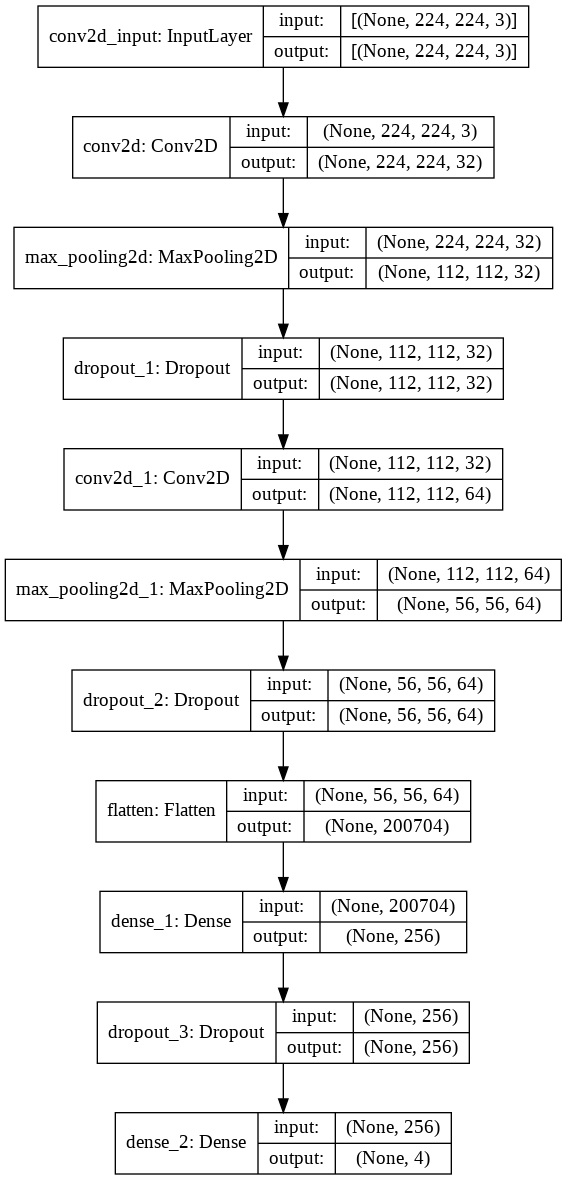

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, 'EfficientNetB0.png', show_shapes=True)

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, 'CNNmodel.png', show_shapes=True)

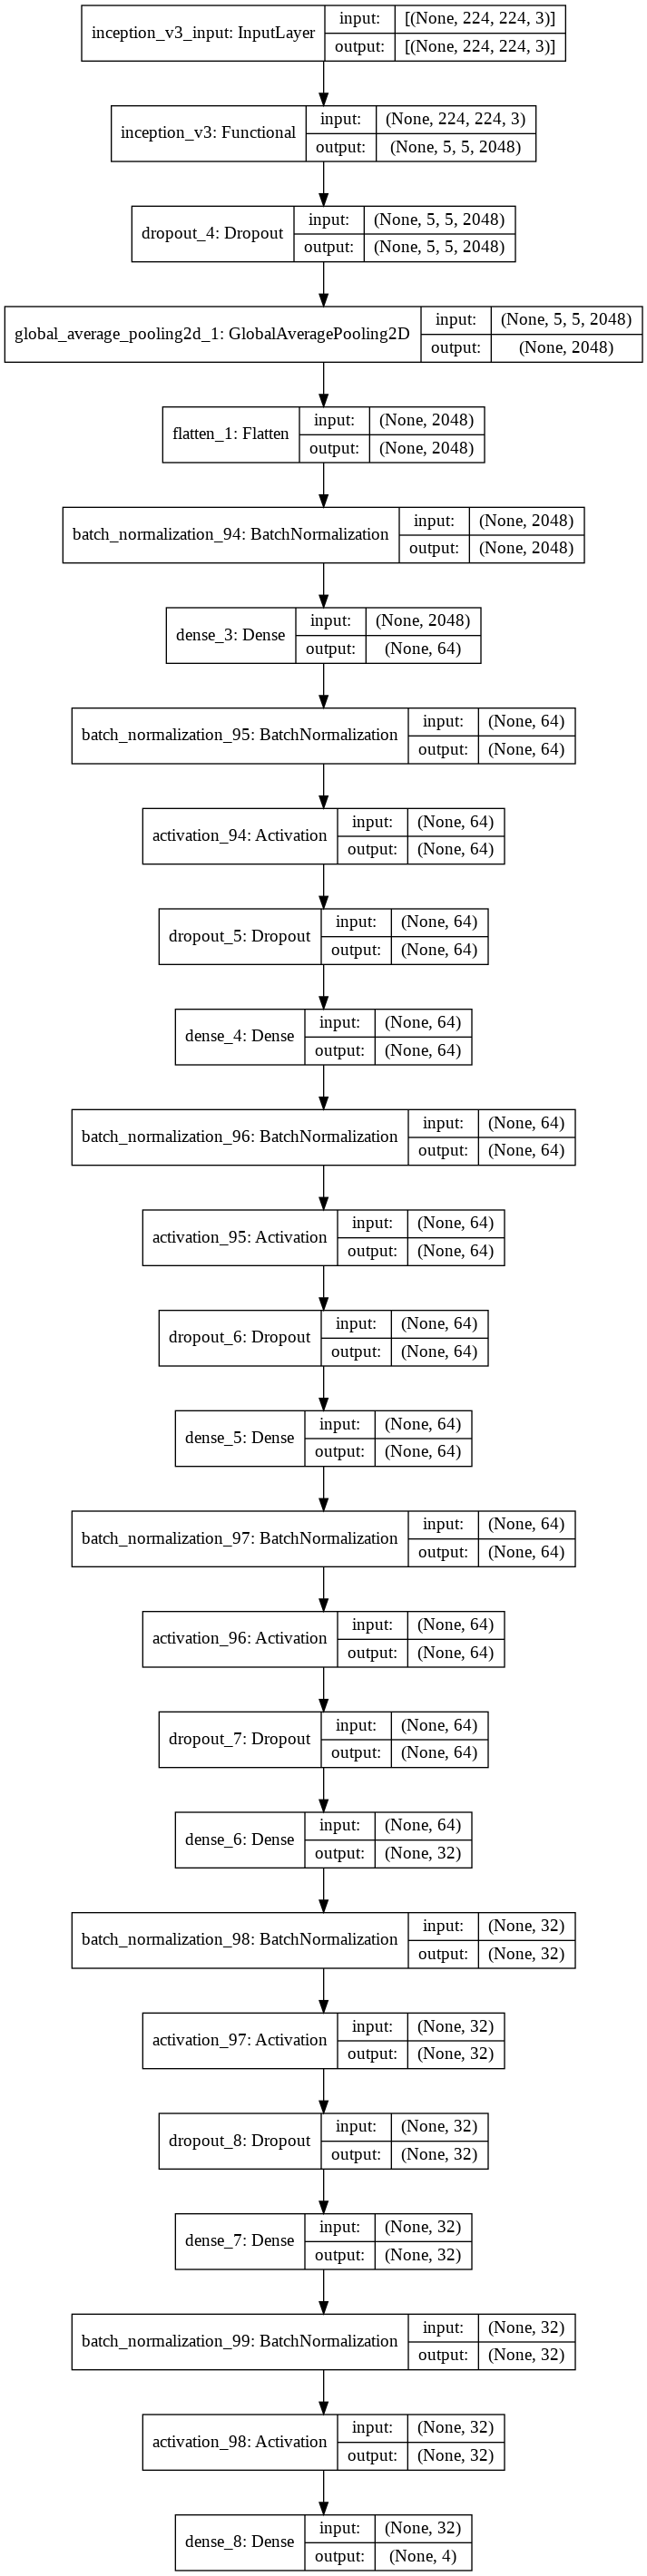

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, 'InceptionV3model.png', show_shapes=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.580944 to fit



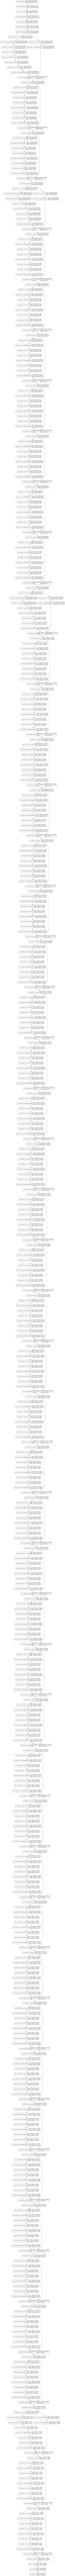

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, 'ResNet model.png', show_shapes=True)

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, 'AlexNet model.png', show_shapes=True)

***Training the five models***

In [ ]:
#train the EffNet model
history = model.fit(x_train,y_train,epochs=15,validation_data = (x_test,y_test),verbose=1,
                              callbacks=[checkpoint,earlystop,reduce_lr])

Epoch 1/15
119/119 [==============================] - 53s 317ms/step - loss: 1.0962 - accuracy: 0.5003 - val_loss: 1.1845 - val_accuracy: 0.4915

Epoch 00001: val_accuracy improved from -inf to 0.49154, saving model to effnet.h5
Epoch 2/15
119/119 [==============================] - 37s 308ms/step - loss: 0.6701 - accuracy: 0.7196 - val_loss: 1.2029 - val_accuracy: 0.4746

Epoch 00002: val_accuracy did not improve from 0.49154
Epoch 3/15
119/119 [==============================] - 37s 314ms/step - loss: 0.4270 - accuracy: 0.8330 - val_loss: 1.0471 - val_accuracy: 0.5465

Epoch 00003: val_accuracy improved from 0.49154 to 0.54651, saving model to effnet.h5
Epoch 4/15
119/119 [==============================] - 37s 310ms/step - loss: 0.2482 - accuracy: 0.9130 - val_loss: 1.0922 - val_accuracy: 0.5529

Epoch 00004: val_accuracy improved from 0.54651 to 0.55285, saving model to effnet.h5
Epoch 5/15
119/119 [==============================] - 37s 312ms/step - loss: 0.1495 - accuracy: 0.9492 - v

In [ ]:
#train the CNN model
history_1 = model_1.fit(x_train,y_train,epochs=15,validation_data = (x_test,y_test),verbose=1,
                              callbacks=[checkpoint,earlystop,reduce_lr])

Epoch 1/15
119/119 [==============================] - 8s 65ms/step - loss: 207.8533 - accuracy: 0.3839 - val_loss: 1.3588 - val_accuracy: 0.4334

Epoch 00001: val_accuracy did not improve from 0.95455
Epoch 2/15
119/119 [==============================] - 7s 62ms/step - loss: 1.2760 - accuracy: 0.4323 - val_loss: 1.3335 - val_accuracy: 0.4588

Epoch 00002: val_accuracy did not improve from 0.95455
Epoch 3/15
119/119 [==============================] - 7s 62ms/step - loss: 1.2405 - accuracy: 0.4379 - val_loss: 1.3118 - val_accuracy: 0.4767

Epoch 00003: val_accuracy did not improve from 0.95455
Epoch 4/15
119/119 [==============================] - 7s 62ms/step - loss: 1.1888 - accuracy: 0.4397 - val_loss: 1.2707 - val_accuracy: 0.4535

Epoch 00004: val_accuracy did not improve from 0.95455
Epoch 5/15
119/119 [==============================] - 7s 62ms/step - loss: 1.1907 - accuracy: 0.3961 - val_loss: 1.2308 - val_accuracy: 0.4683

Epoch 00005: val_accuracy did not improve from 0.95455

Ep

In [ ]:
#train the InceptionV3 model
history_2 = model_2.fit(x_train,y_train,epochs=15,validation_data = (x_test,y_test),verbose=1,
                              callbacks=[checkpoint,earlystop,reduce_lr])

Epoch 1/15
119/119 [==============================] - 10s 84ms/step - loss: 1.3849 - accuracy: 0.3510 - val_loss: 1.2959 - val_accuracy: 0.4366

Epoch 00001: val_accuracy did not improve from 0.95455
Epoch 2/15
119/119 [==============================] - 10s 85ms/step - loss: 1.2943 - accuracy: 0.3956 - val_loss: 1.2585 - val_accuracy: 0.4672

Epoch 00002: val_accuracy did not improve from 0.95455
Epoch 3/15
119/119 [==============================] - 10s 85ms/step - loss: 1.2821 - accuracy: 0.3935 - val_loss: 1.2280 - val_accuracy: 0.4863

Epoch 00003: val_accuracy did not improve from 0.95455
Epoch 4/15
119/119 [==============================] - 10s 85ms/step - loss: 1.2647 - accuracy: 0.4014 - val_loss: 1.2031 - val_accuracy: 0.5032

Epoch 00004: val_accuracy did not improve from 0.95455
Epoch 5/15
119/119 [==============================] - 10s 84ms/step - loss: 1.2194 - accuracy: 0.4181 - val_loss: 1.1855 - val_accuracy: 0.4958

Epoch 00005: val_accuracy did not improve from 0.95455


In [ ]:
#train the ResNet model
history_3 = model_3.fit(x_train,y_train,epochs=15,validation_data = (x_test,y_test),verbose=1,
                              callbacks=[checkpoint,earlystop,reduce_lr])

Epoch 1/15
119/119 [==============================] - 40s 339ms/step - loss: 0.8807 - accuracy: 0.6662 - val_loss: 0.5954 - val_accuracy: 0.7326

Epoch 00001: val_accuracy did not improve from 0.95455
Epoch 2/15
119/119 [==============================] - 36s 305ms/step - loss: 0.4315 - accuracy: 0.8227 - val_loss: 0.5635 - val_accuracy: 0.7748

Epoch 00002: val_accuracy did not improve from 0.95455
Epoch 3/15
119/119 [==============================] - 37s 309ms/step - loss: 0.2558 - accuracy: 0.9001 - val_loss: 0.5024 - val_accuracy: 0.8002

Epoch 00003: val_accuracy did not improve from 0.95455
Epoch 4/15
119/119 [==============================] - 37s 309ms/step - loss: 0.1267 - accuracy: 0.9693 - val_loss: 0.2977 - val_accuracy: 0.8816

Epoch 00004: val_accuracy did not improve from 0.95455
Epoch 5/15
119/119 [==============================] - 37s 307ms/step - loss: 0.0656 - accuracy: 0.9958 - val_loss: 0.3431 - val_accuracy: 0.8763

Epoch 00005: val_accuracy did not improve from 0.9

In [ ]:
#train the AlexNet model
history_4 = model_4.fit(x_train,y_train,epochs=15,validation_data = (x_test,y_test),verbose=1,
                              callbacks=[checkpoint,earlystop,reduce_lr])

Epoch 1/15
119/119 [==============================] - 9s 71ms/step - loss: 1.1731 - accuracy: 0.4163 - val_loss: 1.1244 - val_accuracy: 0.4376

Epoch 00001: val_accuracy did not improve from 0.95455
Epoch 2/15
119/119 [==============================] - 8s 69ms/step - loss: 1.1109 - accuracy: 0.4265 - val_loss: 1.1517 - val_accuracy: 0.4376

Epoch 00002: val_accuracy did not improve from 0.95455
Epoch 3/15
119/119 [==============================] - 8s 69ms/step - loss: 1.0937 - accuracy: 0.4187 - val_loss: 0.9699 - val_accuracy: 0.5529

Epoch 00003: val_accuracy did not improve from 0.95455
Epoch 4/15
119/119 [==============================] - 8s 69ms/step - loss: 0.9474 - accuracy: 0.5588 - val_loss: 0.9048 - val_accuracy: 0.5296

Epoch 00004: val_accuracy did not improve from 0.95455
Epoch 5/15
119/119 [==============================] - 8s 68ms/step - loss: 0.8324 - accuracy: 0.6121 - val_loss: 0.8007 - val_accuracy: 0.6131

Epoch 00005: val_accuracy did not improve from 0.95455
Epoch

***Plotting accuracy and loss***

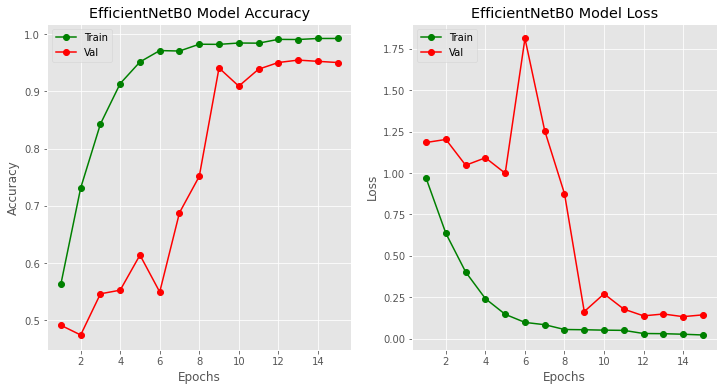

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],'go-')
plt.plot(epochs,history.history["val_accuracy"],'ro-')
plt.title("EfficientNetB0 Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],'go-')
plt.plot(epochs,history.history["val_loss"],'ro-')
plt.title("EfficientNetB0 Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")


plt.show()

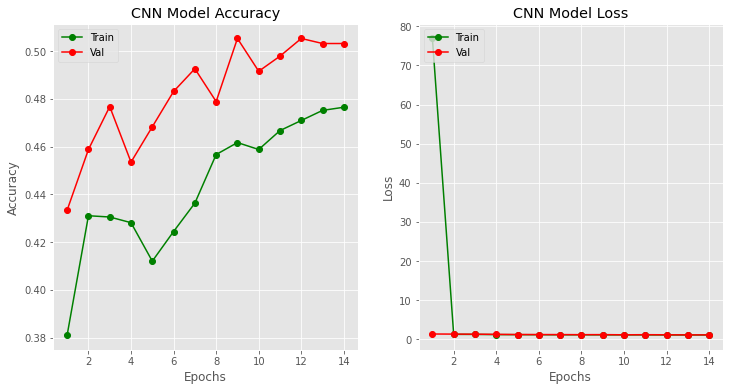

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,15)
plt.subplot(1,2,1)
plt.plot(epochs,history_1.history["accuracy"],'go-')
plt.plot(epochs,history_1.history["val_accuracy"],'ro-')
plt.title("CNN Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history_1.history["loss"],'go-')
plt.plot(epochs,history_1.history["val_loss"],'ro-')
plt.title("CNN Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")


plt.show()

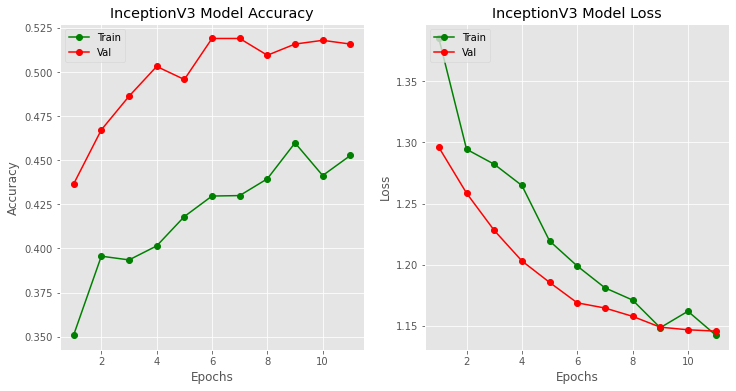

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,12)
plt.subplot(1,2,1)
plt.plot(epochs,history_2.history["accuracy"],'go-')
plt.plot(epochs,history_2.history["val_accuracy"],'ro-')
plt.title("InceptionV3 Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history_2.history["loss"],'go-')
plt.plot(epochs,history_2.history["val_loss"],'ro-')
plt.title("InceptionV3 Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")


plt.show()

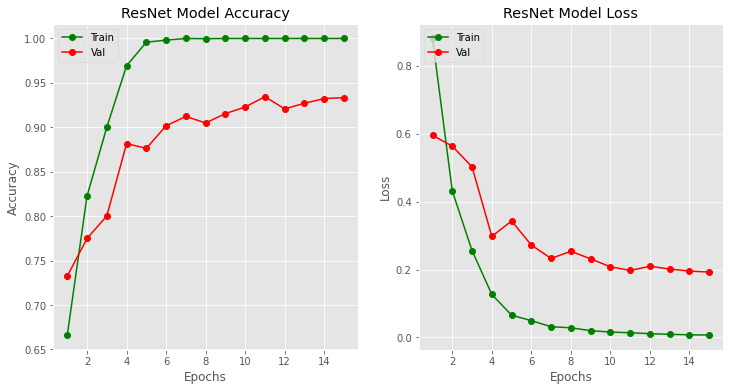

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history_3.history["accuracy"],'go-')
plt.plot(epochs,history_3.history["val_accuracy"],'ro-')
plt.title("ResNet Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history_3.history["loss"],'go-')
plt.plot(epochs,history_3.history["val_loss"],'ro-')
plt.title("ResNet Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")


plt.show()

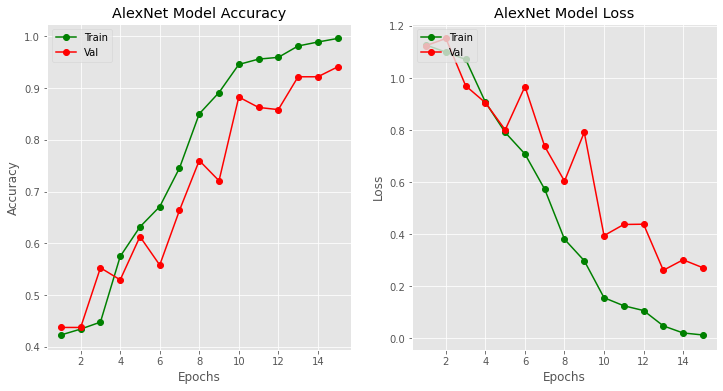

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history_4.history["accuracy"],'go-')
plt.plot(epochs,history_4.history["val_accuracy"],'ro-')
plt.title("AlexNet Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history_4.history["loss"],'go-')
plt.plot(epochs,history_4.history["val_loss"],'ro-')
plt.title("AlexNet Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")


plt.show()

In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test)
train_loss,train_acc = model.evaluate(x_train,y_train)
print(f"EffNet Test Loss: {test_loss}")
print(f"EffNet Test Accuracy: {test_acc}")
print(f"EffNet Training Loss: {train_loss}")
print(f"EffNet Training Accuracy: {train_acc}")

119/119 [==============================] - 7s 57ms/step - loss: 5.0879e-04 - accuracy: 1.0000
EffNet Test Loss: 0.143701434135437
EffNet Test Accuracy: 0.9503171443939209
EffNet Training Loss: 0.0005087855970486999
EffNet Training Accuracy: 1.0


In [ ]:
test_loss_1,test_acc_1 = model_1.evaluate(x_test,y_test)
train_loss_1,train_acc_1 = model_1.evaluate(x_train,y_train)
print(f"CNN Test Loss: {test_loss_1}")
print(f"CNN Test Accuracy: {test_acc_1}")
print(f"CNN Training Loss: {train_loss_1}")
print(f"CNN Training Accuracy: {train_acc_1}")

119/119 [==============================] - 2s 14ms/step - loss: 1.1254 - accuracy: 0.5206
CNN Test Loss: 1.1402912139892578
CNN Test Accuracy: 0.5031712651252747
CNN Training Loss: 1.1253514289855957
CNN Training Accuracy: 0.5206131339073181


In [ ]:
test_loss_2,test_acc_2 = model_2.evaluate(x_test,y_test)
train_loss_2,train_acc_2 = model_2.evaluate(x_train,y_train)
print(f"InceptionV3 Test Loss: {test_loss_2}")
print(f"InceptionV3 Test Accuracy: {test_acc_2}")
print(f"InceptionV3 Training Loss: {train_loss_2}")
print(f"InceptionV3 Training Accuracy: {train_acc_2}")

119/119 [==============================] - 8s 67ms/step - loss: 1.1422 - accuracy: 0.5069
InceptionV3 Test Loss: 1.1457265615463257
InceptionV3 Test Accuracy: 0.5158562660217285
InceptionV3 Training Loss: 1.1422080993652344
InceptionV3 Training Accuracy: 0.5068710446357727


In [ ]:
test_loss_3,test_acc_3 = model_3.evaluate(x_test,y_test)
train_loss_3,train_acc_3 = model_3.evaluate(x_train,y_train)
print(f"ResNet Test Loss: {test_loss_3}")
print(f"ResNet Test Accuracy: {test_acc_3}")
print(f"ResNet Training Loss: {train_loss_3}")
print(f"ResNet Training Accuracy: {train_acc_3}")

119/119 [==============================] - 28s 237ms/step - loss: 0.0069 - accuracy: 1.0000
ResNet Test Loss: 0.1927751749753952
ResNet Test Accuracy: 0.9334037899971008
ResNet Training Loss: 0.0068605924025177956
ResNet Training Accuracy: 1.0


In [ ]:
test_loss_4,test_acc_4 = model_4.evaluate(x_test,y_test)
train_loss_4,train_acc_4 = model_4.evaluate(x_train,y_train)
print(f"AlexNet Test Loss: {test_loss_4}")
print(f"AlexNet Test Accuracy: {test_acc_4}")
print(f"AlexNet Training Loss: {train_loss_4}")
print(f"AlexNet Training Accuracy: {train_acc_4}")

119/119 [==============================] - 3s 24ms/step - loss: 0.0093 - accuracy: 1.0000
AlexNet Test Loss: 0.2712964415550232
AlexNet Test Accuracy: 0.9408034086227417
AlexNet Training Loss: 0.009274394251406193
AlexNet Training Accuracy: 1.0


***Classification Report***

We evaluate Pecision, Recall, F1score, and Support for the five models.

In [ ]:
y_pred= model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)
y_test_new = np.argmax(y_test,axis=1)

[0 1 2 3] [180  18 328 420]


In [ ]:
y_pred_1 = model_1.predict(x_test)
y_pred_1 = np.argmax(y_pred_1,axis=1)
unique_1,counts_1 = np.unique(y_pred_1,return_counts=True)
print(unique_1,counts_1)
y_test_new_1 = np.argmax(y_test,axis=1)

[0 2 3] [  2 641 303]


In [ ]:
y_pred_2 = model_2.predict(x_test)
y_pred_2 = np.argmax(y_pred_2,axis=1)
unique_2,counts_2 = np.unique(y_pred_2,return_counts=True)
print(unique_2,counts_2)
y_test_new_2 = np.argmax(y_test,axis=1)

[0 2 3] [  4 126 816]


In [ ]:
y_pred_3 = model_3.predict(x_test)
y_pred_3 = np.argmax(y_pred_3,axis=1)
unique_3,counts_3 = np.unique(y_pred_3,return_counts=True)
print(unique_3,counts_3)
y_test_new_3 = np.argmax(y_test,axis=1)

[0 1 2 3] [180  17 338 411]


In [ ]:
y_pred_4 = model_4.predict(x_test)
y_pred_4 = np.argmax(y_pred_4,axis=1)
unique_4,counts_4 = np.unique(y_pred_4,return_counts=True)
print(unique_4,counts_4)
y_test_new_4 = np.argmax(y_test,axis=1)

[0 1 2 3] [181  11 324 430]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
clf_report = classification_report(y_test_new,y_pred)
print(clf_report)
clf_report_1 = classification_report(y_test_new_1,y_pred_1)
print(clf_report_1)
clf_report_2 = classification_report(y_test_new_2,y_pred_2)
print(clf_report_2)
clf_report_3 = classification_report(y_test_new_3,y_pred_3)
print(clf_report_3)
clf_report_4 = classification_report(y_test_new_4,y_pred_4)
print(clf_report_4)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       186
           1       1.00      1.00      1.00        18
           2       0.94      0.94      0.94       328
           3       0.94      0.95      0.95       414

    accuracy                           0.95       946
   macro avg       0.97      0.96      0.96       946
weighted avg       0.95      0.95      0.95       946

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.00      0.00      0.00        18
           2       0.46      0.91      0.62       328
           3       0.59      0.43      0.50       414

    accuracy                           0.50       946
   macro avg       0.26      0.33      0.28       946
weighted avg       0.42      0.50      0.43       946

              precision    recall  f1-score   support

           0       0.50      0.01      0.02       186
           1       0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


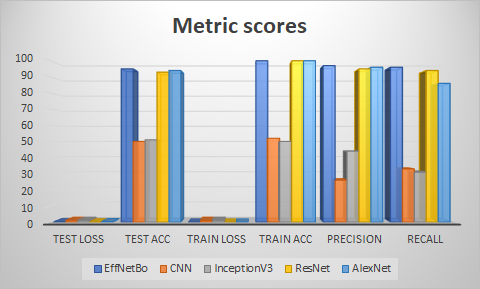

As we can see, we have 3 models that exhibit the best performances: EfficientNetB0, ResNet and AlexNet.

***Confusion Matrix***

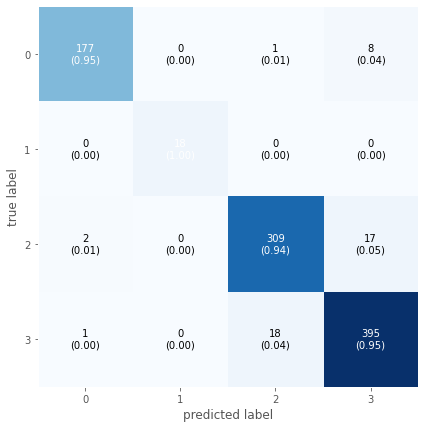

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test_new,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),
                     show_normed=True);

As we can see, we got excellent scores using the EfficientNetBo.

***Model Performance***

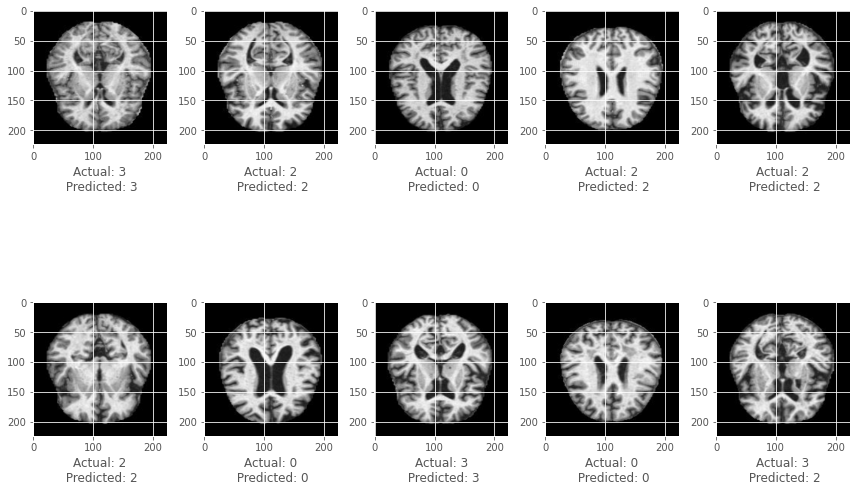

In [ ]:
plt.figure(figsize=(12,9))
for i in range(10):
    sample_idx = random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[sample_idx])
    plt.xlabel(f"Actual: {y_test_new[sample_idx]}\n Predicted: {y_pred[sample_idx]}")
    
plt.tight_layout()
plt.show()

As we can see, each predicted MRI corresponds to the actual ones.